# Project on "Loan Prediction"

Classification problem: Predict if a loan will get approved or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("/Users/admin/Desktop/CSV files/Loan.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

# Data Cleaning and filling missing values

# Missing Values: Check where there are missing value and fix them appropriately

In [4]:
#isnull() function detect missing values in the given series object.
df.isnull()   # output giving in "True = missing value" or "false"

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# counting missing values(every column)
total = df.isnull().sum()
total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [7]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df.Gender = df.Gender.fillna('Male')

In [9]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df.Married = df.Married.fillna("Yes")

In [12]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df.Dependents = df.Dependents.fillna("0")

In [14]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df.Self_Employed = df.Self_Employed.fillna("NO")

In [16]:
df["LoanAmount"].value_counts()  # Different Numeric value

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [17]:
df.LoanAmount.mean()
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean()) 

In [18]:
df["Loan_Amount_Term"].value_counts()   

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
mean=df.Loan_Amount_Term.mean()
print(mean)

df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(mean)   ###

# I can put "360" beacause it is in large numbers

342.0


In [20]:
df["Credit_History"].value_counts().to_frame()

,Credit_History
1.0,475
0.0,89


In [21]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [22]:
total = df.isnull().sum()
total                         # No missing value this is reason output is "0"

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting Categorical Variable into Numeric:

In [50]:
from sklearn.preprocessing import LabelEncoder
var_mod=["Gender","Married","Dependents","Education",
         "Self_Employed","Property_Area","Loan_Status"]
le = LabelEncoder()
#. df["Gender"]= le.fit_transform(df["Gender"])  #for this column
for i in var_mod:
    df[i] = le.fit_transform(df[i])  # all column in var_mod

In [51]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,2,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,1,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,1,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,1,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,1,12841,10968.0,349.000000,360.0,1.0,1,0


# Features Selection:

Here, you need to divide given columns into two types of variables dependent(target variable) and independent (feature variable).

the iloc indexer for Panda DataFrame  is used for integer location based indexing/selection by position

In [25]:
x = df.iloc[:,1:12] # independent variable
y = df.iloc[:,12]  # dependent variable

#  column start from 0

In [26]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,1,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,1,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,2,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,1,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,1,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,1,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,1,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,1,7583,0.0,187.000000,360.0,1.0,2


In [27]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Splitting the Data:

In [28]:
from sklearn.model_selection import train_test_split


'''split the dataset by using function train_test_split so we pass 4 parameters such as features,
traget,test_size and random_state'''

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                              random_state=0)

'''Here, the Dataset is broken into two parts in a ratio of 80:20.
It means 80% data will be used for model training and 20% for model testing'''

'Here, the Dataset is broken into two parts in a ratio of 80:20.\nIt means 80% data will be used for model training and 20% for model testing'

In [29]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,0,2,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,0,1,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,0,1,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,0,1,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,0,1,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,2,0,2,2500,4600.0,176.0,360.0,1.0,0
376,1,1,3,0,1,8750,4996.0,130.0,360.0,1.0,0
278,1,1,0,0,1,14583,0.0,436.0,360.0,1.0,1
466,1,1,3,1,1,2947,1664.0,70.0,180.0,0.0,2


In [30]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

In [31]:
x.shape

(614, 11)

In [32]:
y.shape

(614,)

# Building Decision Tree Model:

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Creat Decision Tree Classifer object
model=DecisionTreeClassifier()

# Train DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
# predict the response for test dataset
y_pred=model.predict(x_test)
y_pred                       # y_test data which predicted

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

## Evaluating Model:

Checking Accuracy:

Accuracy can be computed by compareing actual test set value
and predicted values.

In [35]:
# import the metrics class
from sklearn import metrics
cnf_metrix= metrics.confusion_matrix(y_test,y_pred)
cnf_metrix

# Diagonal elements present correct prediction left to right
# 25+86 correct
# incorrect 20+13
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6829268292682927


# Logistic Regression Model :

firstly, import the logistic model regression

In [36]:
from sklearn.linear_model import LogisticRegression
# Creating Logistic Regression classifier object
logistic_regression=LogisticRegression()

In [37]:
## fit the model with data
logistic_regression.fit(x_train,y_train)
y_predit=logistic_regression.predict(x_test)
y_predit

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [38]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

## Model Evaluation using Confusion Matrix (Binary Classification model)

In [39]:
from sklearn import metrics
cnf_matrixs= metrics.confusion_matrix(y_test,y_predit)
print(cnf_matrixs)

[[15 18]
 [ 2 88]]


In [40]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predit))
# In Logistic Regression Accuracy = 83.75%

Accuracy: 0.8373983739837398


## Visualizing Confusion Matrix using Heatmap:

In [41]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

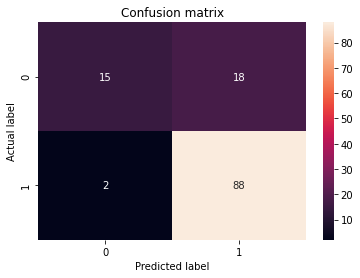

In [42]:
import seaborn as sn
#Here, annot is an array of same shape as data which is used to annatate the heatmap
sn.heatmap(cnf_matrixs,annot=True)
    #
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

<AxesSubplot:>

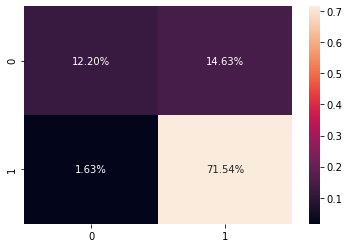

In [43]:
# Represent Heatmap with confusion matrix in form of Percentage:
sn.heatmap(cnf_matrixs/np.sum(cnf_matrixs),annot = True,
          fmt=".2%")
# fmt- string formatting code to use whenadding annotations.

<AxesSubplot:>

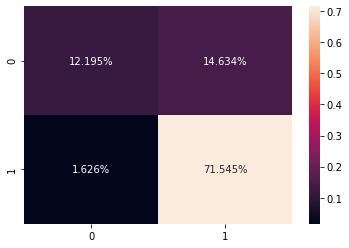

In [44]:
sn.heatmap(cnf_matrixs/np.sum(cnf_matrixs),annot = True,
          fmt=".3%")

# Let's predict whether the loan will get approved or not for a person(John) who is applying for loan:

Convert the categorical variable value into numeric form.

Gender : Male (1)
Married: Yes (1)
Dependents: 1
Education: Graduate (0)
Self_Employed: No (0)
ApplicantIncome: 8000
CoapplicantIncome: 2000
LoanAmount (in thousand): 130 Loan_Amount_Term(Term of loan in months): 24 Credit_History: 0.0
Property_Area (Urban/ Semi Urban/ Rural): Urban (2)

In [45]:
loanstatus=logistic_regression.predict([[1,1,1,0,0,8000,2000,
                                         130,24,0.0,2]])
loanstatus
# loan is approved and 24 is months

array([1])

In [46]:
loanstatus2=logistic_regression.predict([[1,1,1,0,0,5000,0,
                                         250,12,0.0,2]])
loanstatus2
# loan is not approved

array([1])

In [47]:
loanstatus2=logistic_regression.predict([[1,1,1,0,0,5000,0,
                                         150,12,0.0,1]])
loanstatus2

array([1])

# Applying various model and compare which is best:

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error

lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC(random_state = 43, C = 10, gamma = 0.1, kernel ='rbf')
gnb = GaussianNB()
rf = RandomForestClassifier(random_state=43)

In [49]:
models = [rf, dt, kn, svc,lr, gnb]

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    scores = cross_val_score(model, x, y, cv=5).mean().round(2)
    accuracy = metrics.accuracy_score(y_test, y_pred).round(2)
    #f1score = metrics.f1_score(y_test, y_pred).round(3)
    print(model, '\n', 'Accuracy: ', accuracy,'\n', 'mean_CV_score: ',scores)

RandomForestClassifier(random_state=43) 
 Accuracy:  0.78 
 mean_CV_score:  0.79
DecisionTreeClassifier() 
 Accuracy:  0.68 
 mean_CV_score:  0.71
KNeighborsClassifier() 
 Accuracy:  0.65 
 mean_CV_score:  0.62
SVC(C=10, gamma=0.1, random_state=43) 
 Accuracy:  0.74 
 mean_CV_score:  0.69
LogisticRegression() 
 Accuracy:  0.84 
 mean_CV_score:  0.81
GaussianNB() 
 Accuracy:  0.83 
 mean_CV_score:  0.79


### -> We can make conclusion logistic Regression is better then others